# Lecture 02 - Is Learning Feasible?

In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

### Hoeffding's Inequality

<img src="img/hoeffding-equation.PNG" />

When Hoeffding's Inequality equations is true, than, in a probabilistic point of view, when we can assume that the mean of a **sample A** obtained from a population is probably approximately equal to the population mean.

#### Single bin

In [25]:
# Creating the population.
bin = np.random.randint(2, size=1000)
mi = bin.mean()
print(mi)

# Choosing the sample.
nu = np.random.choice(bin, 400, replace=True).mean()
print(nu)

0.498
0.5375


In [79]:
error = 0.05
bad_event = 0

for i in range(10):
    bad_event = 0

    for j in range(1000):
        random_nu = np.random.choice(bin, 400, replace=False).mean()
        if abs(random_nu - mi) > error:
            bad_event += 1

    print(f"Round {i+1}: frequency of bad events equals {bad_event} of 1000")

Round 1: frequency of bad events equals 7 of 1000
Round 2: frequency of bad events equals 10 of 1000
Round 3: frequency of bad events equals 9 of 1000
Round 4: frequency of bad events equals 9 of 1000
Round 5: frequency of bad events equals 9 of 1000
Round 6: frequency of bad events equals 9 of 1000
Round 7: frequency of bad events equals 12 of 1000
Round 8: frequency of bad events equals 8 of 1000
Round 9: frequency of bad events equals 14 of 1000
Round 10: frequency of bad events equals 10 of 1000


In [33]:
# Applying Hoeffding's Inequality equation.
max_prob = 2 * math.e**(-2 * error**2 * 400)

print(f"Hoeffding's threshold of bad events: {int(max_prob * 100)} of 1000")

Hoeffding's threshold of bad events: 27 of 1000


#### Multiple Bins (coin example)

When faced with multiple bins, Hoeffding Inequality behaves poorly. The threshold is design to be applied on just one bin (or variable), since it does not account for the overlap of the probabilities of each term to result in a bad event.

<img src="img/hoeffding-equation2.PNG" />

In [195]:
event_count = 0

for i in range(10000):
    coin_toss = np.random.randint(2, size=10)
    if coin_toss.sum() == 10:
        event_count += 1

print(f"All heads: {event_count} of 10000 ({round(event_count/100, 1)}%) rounds.")

All heads: 11 of 10000 (0.1%) rounds.


In [196]:
event_count = 0

for i in range(10000):
    df = pd.DataFrame(data=np.random.randint(0, 2, size=(1000, 10)))
    df['all_heads'] = df.sum(axis=1)
    if df['all_heads'].max() == 10:
        event_count += 1

print(f"All heads: {event_count} of 10000 ({round(event_count/100, 1)}%) rounds.")

All heads: 6309 of 10000 (63.1%) rounds.


In [7]:
# (extra) How fast the Hoeffding threshold increases based on the number of coins?
 
event_list = []
event_count = 0

for i in range(1, 21, 1):
    for j in range(10000):
        df = pd.DataFrame(data=np.random.randint(0, 2, size=(i, 10)))
        df['all_heads'] = df.sum(axis=1)
        if df['all_heads'].max() == 10:
            event_count += 1

    event_list.append(event_count)
    print(f"{i} coins: {event_count} of 10000 ({round(event_count/100, 1)}%) all heads ocurrence.")

1 coins: 6 of 10000 (0.1%) all heads ocurrence.
2 coins: 25 of 10000 (0.2%) all heads ocurrence.
3 coins: 56 of 10000 (0.6%) all heads ocurrence.
4 coins: 101 of 10000 (1.0%) all heads ocurrence.
5 coins: 155 of 10000 (1.6%) all heads ocurrence.
6 coins: 219 of 10000 (2.2%) all heads ocurrence.
7 coins: 285 of 10000 (2.9%) all heads ocurrence.
8 coins: 374 of 10000 (3.7%) all heads ocurrence.
9 coins: 470 of 10000 (4.7%) all heads ocurrence.
10 coins: 566 of 10000 (5.7%) all heads ocurrence.
11 coins: 664 of 10000 (6.6%) all heads ocurrence.
12 coins: 788 of 10000 (7.9%) all heads ocurrence.
13 coins: 909 of 10000 (9.1%) all heads ocurrence.
14 coins: 1031 of 10000 (10.3%) all heads ocurrence.
15 coins: 1167 of 10000 (11.7%) all heads ocurrence.
16 coins: 1315 of 10000 (13.2%) all heads ocurrence.
17 coins: 1471 of 10000 (14.7%) all heads ocurrence.
18 coins: 1648 of 10000 (16.5%) all heads ocurrence.
19 coins: 1836 of 10000 (18.4%) all heads ocurrence.
20 coins: 2052 of 10000 (20.5%) 

<AxesSubplot:xlabel='Number of coins', ylabel='Frequency all heads output (%)'>

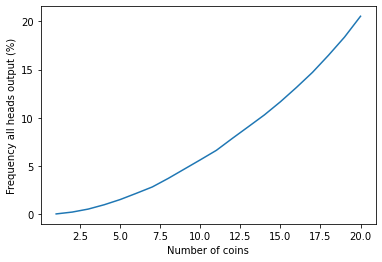

In [19]:
data = pd.DataFrame({'Number of coins': range(1, 21, 1), 'Frequency all heads output (%)': np.array(event_list)/100})
sns.lineplot(data=data, x='Number of coins', y='Frequency all heads output (%)')

**Conclusion:**
the plot above suggests that the increase of Hoeffding's threshold follows a exponential curve. This evidence illustrate how sensible the threshold is for the addition of new variables into a model, since the threshold tends to increase faster than the model complexity. 